# IPL Exoloratory Analysis Part-II

### In this part-II, we will explore some batting stats from different perspecticves like seasonwise, teamwise, match aggregates, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
matches = pd.read_csv('matches.csv')
deliv = pd.read_csv('deliveries.csv')
deliv

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [3]:
team_names=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

abbrs = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

matches.replace(team_names,abbrs,inplace = True)
deliv.replace(team_names, abbrs, inplace = True)

#matches.drop(columns='umpire3', inplace=True)

deliv = deliv[deliv['inning']<3]
matches = matches[matches['result']=='normal']
matches = matches[matches['dl_applied'] == 0]

deliv = deliv.merge(matches, left_on='match_id', right_on='id')

In [4]:
## Taking care of a few things
def batruns(nb):
    if nb>1:
        bat = nb - 1
        return int(bat)
def extraruns(nb):
    if nb>1:
        return 1

def is_chased(bat, winner):
    return int(bat!=winner)

In [5]:
deliv['batsman_runs'] = deliv.apply(lambda row: batruns(row['noball_runs']), axis=1)

In [6]:
deliv['extra_runs'] = deliv.apply(lambda row: extraruns(row['noball_runs']), axis=1)

## Total Runs Scored

In [7]:
tot_runs = deliv['total_runs'].sum()
print(tot_runs, 'runs have been scored in total')

227211 runs have been scored in total


## Average Runs per Match

In [8]:
match = deliv.groupby('match_id')['total_runs'].sum().reset_index()
avg_score = match['total_runs'].sum()/len(match['total_runs'])
print('Average Match Aggregate Score is', avg_score)

Average Match Aggregate Score is 313.8273480662983


## Average Runs per Inning

In [9]:
inn = deliv.groupby(['match_id','inning'])['total_runs'].sum().reset_index()
avg_score = inn['total_runs'].sum()/len(inn['total_runs'])
print('The average inning score is : ', int(avg_score))

The average inning score is :  156


## Highest and Lowest Aggregate Scores

In [10]:
highest = match['total_runs'].max()
lowest = match['total_runs'].min()
print('Highest Aggregate score in a match :', highest)
print('Lowest Aggregate score in a match :', lowest)

Highest Aggregate score in a match : 471
Lowest Aggregate score in a match : 135


## Seasonwise Total & Average Runs

Text(0.5, 1.0, 'Total Runs Scored per Season')

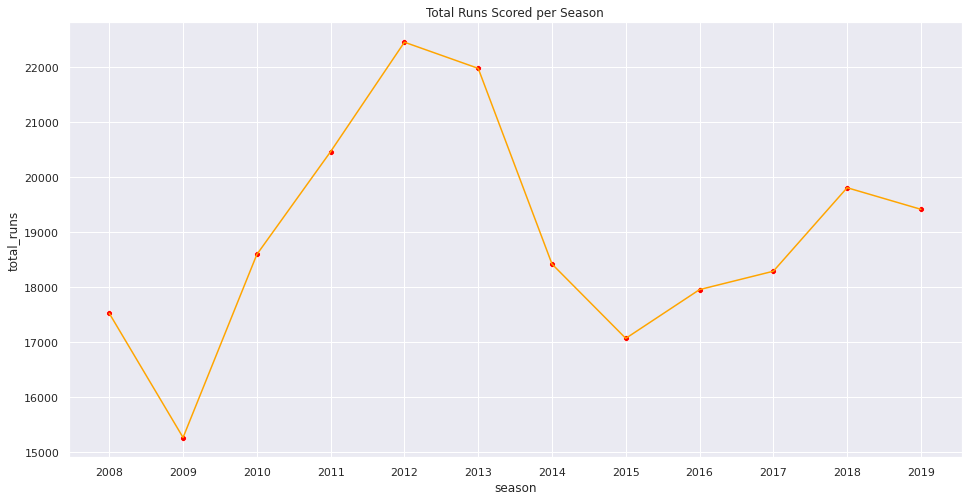

In [37]:
plt.figure(figsize=(16,8))
season = deliv.groupby('season')['total_runs'].sum().reset_index()
season['matches']= matches.groupby('season')['id'].count().reset_index()['id']
season['avg_score'] = season['total_runs'] / season['matches']
sns.lineplot(x='season',y='total_runs', data=season, color='orange')
plt.xticks(np.arange(2008,2020))
sns.scatterplot(x='season',y='total_runs', data=season, color='red')
plt.title('Total Runs Scored per Season')

Text(0.5, 1.0, 'Average Runs Scored per Match per Season')

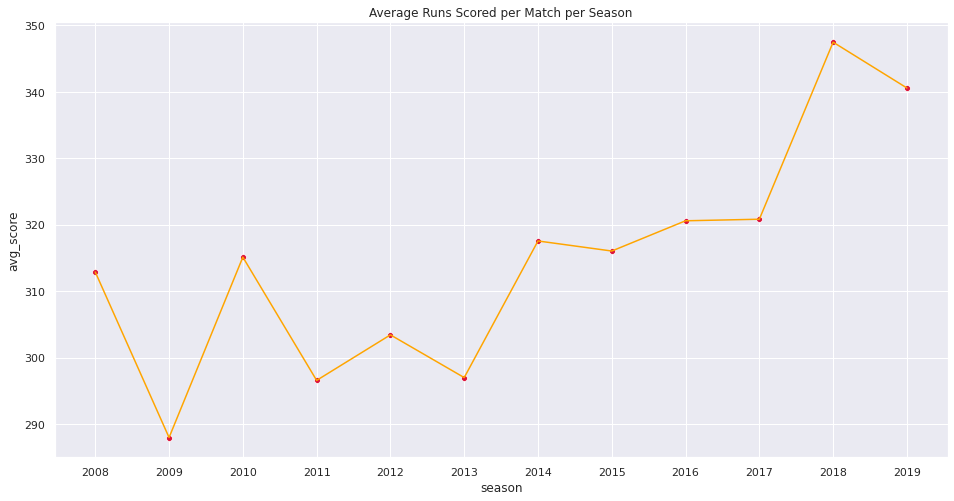

In [40]:
plt.figure(figsize=(16,8))
sns.lineplot(x='season',y='avg_score', data=season, color='orange')
plt.xticks(np.arange(2008,2020))
sns.scatterplot(x='season',y='avg_score', data=season, color='crimson')
plt.title('Average Runs Scored per Match per Season')

### Some observations :
- The total runs score was the highest for the 2013 season (due to the most number of matches).
- Also, the average score was the highest for the 2018 season.
- The lowest total and average score was for the 2009 season (which was played in South Africa).

## Teamwise Average Inning Score

In [13]:
teams = deliv.groupby(['batting_team'])['total_runs'].sum().reset_index()
teams.columns=['Team','Total Runs']
played = pd.concat([matches['team1'], matches['team2']])
played = played.value_counts().reset_index()
played.columns = ['Team', 'Matches']
teams = teams.merge(played, on='Team')
teams['Avg Score'] = teams['Total Runs']/teams['Matches']
teams = teams.sort_values(by='Avg Score', ascending = False)
teams

,Team,Total Runs,Matches,Avg Score
0,CSK,25788,159,162.188679
2,GL,4703,29,162.172414
5,KXIP,26763,168,159.303571
6,MI,29466,185,159.275676
8,RCB,27148,172,157.837209
9,RPS,4260,27,157.777778
11,SRH,27599,176,156.812500
3,KKR,26098,167,156.275449
10,RR,21555,140,153.964286
1,DC,25707,167,153.934132


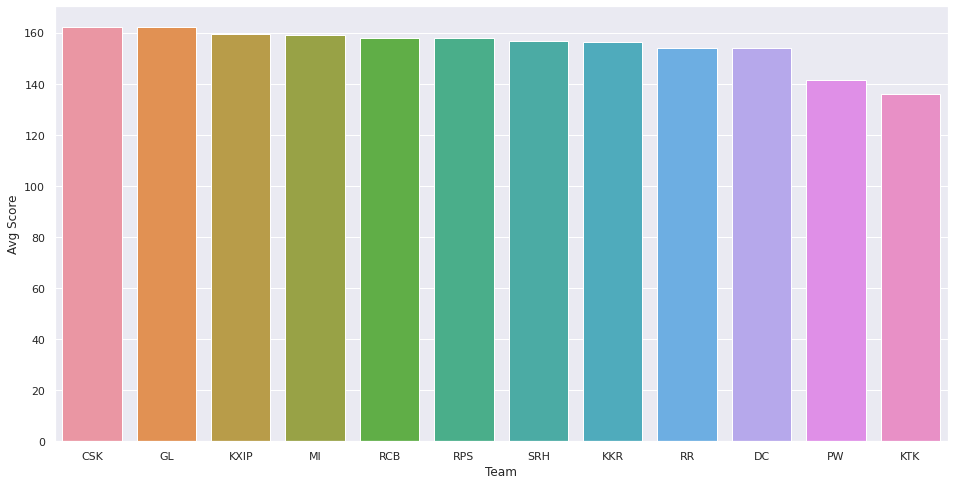

In [14]:
plt.figure(figsize=(16,8))
sns.barplot(x='Team', y='Avg Score', data=teams)

### Chennai Super Kings have the highest average inning score, although there is not much difference in the top average scores

## Locating the Batsman's Paradise

In [15]:
mat = matches['venue'].value_counts().reset_index()
venues = deliv.groupby('venue')['total_runs'].sum().reset_index()
mat.columns = ['venue', 'matches']
venues = mat.merge(venues, on='venue')
venues['avg_score'] = venues['total_runs']/venues['matches']
venues = venues.sort_values(by = 'avg_score', ascending=False)
venues[:10]

,venue,matches,total_runs,avg_score
14,Brabourne Stadium,11,3842,349.272727
17,Saurashtra Cricket Association Stadium,9,3010,334.444444
1,M Chinnaswamy Stadium,73,24083,329.904110
33,ACA-VDCA Stadium,2,658,329.000000
8,Maharashtra Cricket Association Stadium,21,6871,327.190476
23,Barabati Stadium,7,2278,325.428571
28,Green Park,4,1298,324.500000
15,Holkar Cricket Stadium,9,2920,324.444444
5,"Punjab Cricket Association Stadium, Mohali",56,18151,324.125000
2,Wankhede Stadium,72,23298,323.583333


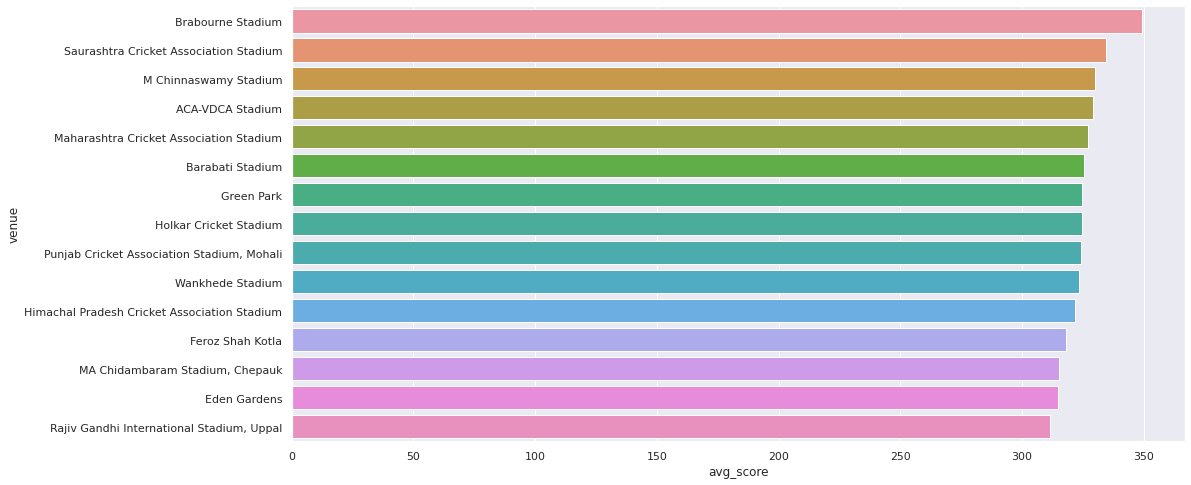

In [16]:
plt.figure(figsize=(16,8))
sns.barplot(y='venue', x='avg_score', data=venues[:15], orient='h')

##### Brabourne Stadium has the highest avergae match score (almost 350)

## Highest and Lowest Inning Totals

In [17]:
scores = deliv.groupby(['match_id','inning'])['total_runs'].sum().reset_index()
scores.sort_values(by='total_runs', ascending=False)

,match_id,inning,total_runs
790,411,1,263
1300,7937,1,250
1192,620,1,248
392,206,1,246
1424,11338,1,241
...,...,...,...
66,35,1,67
192,99,1,67
85,44,2,66
229,119,2,58


In [18]:
## Highest Inning Score = 263
matches[matches['id'] == 411]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
303,411,2013,Bangalore,2013-04-23,RCB,PW,PW,field,normal,0,RCB,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin,NaN


In [19]:
## Lowest Inning Score == 49
matches[matches['id'] == 27]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
64,27,2017,Kolkata,2017-04-23,KKR,RCB,RCB,field,normal,0,KKR,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan,NaN


### Well, well, well, the highest and the lowest total records are held by the same team - Royals Challengers Bangalore 
###### * Ee sala cup namde intensifies *

## Teamwise Highest and Lowest Scores

In [20]:
scores = deliv.groupby(['match_id','batting_team'])['total_runs'].sum().reset_index()
high = scores.groupby('batting_team')['total_runs'].max()
high

batting_team
CSK     246
DC      231
GL      208
KKR     250
KTK     184
KXIP    232
MI      230
PW      192
RCB     263
RPS     195
RR      231
SRH     233
Name: total_runs, dtype: int64

In [21]:
low = scores.groupby('batting_team')['total_runs'].min()
low.index

Index(['CSK', 'DC', 'GL', 'KKR', 'KTK', 'KXIP', 'MI', 'PW', 'RCB', 'RPS', 'RR',
       'SRH'],
      dtype='object', name='batting_team')

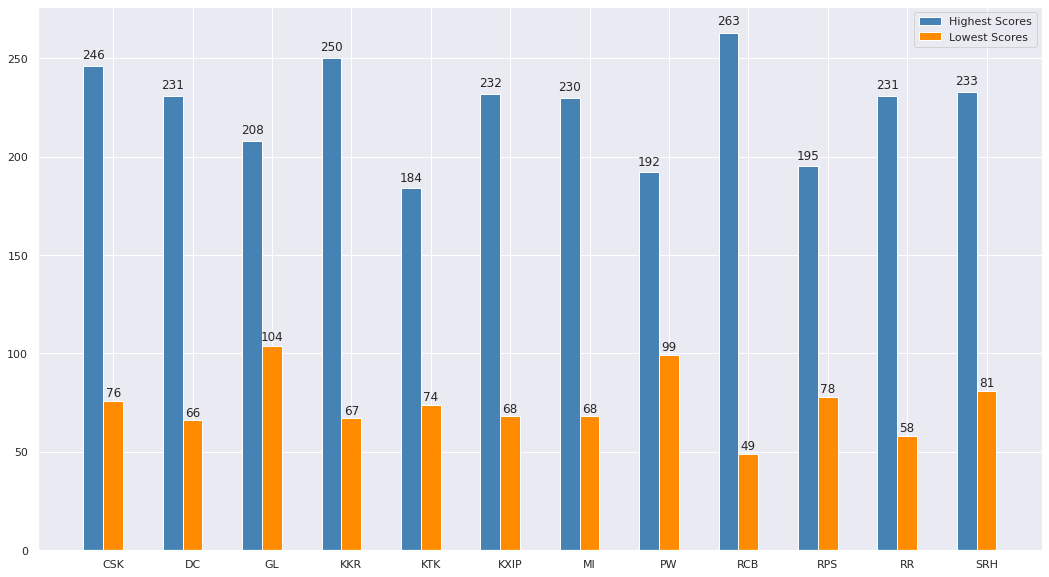

In [22]:
plt.figure(figsize=(18,10))

ax = plt.subplot(111)

ind = np.arange(12)
width = 0.25

yvals = high
rects1 = ax.bar(ind, yvals, width, color='steelblue')
zvals = low
rects2 = ax.bar(ind+width, zvals, width, color='darkorange')

ax.set_xticks(ind+width)
ax.set_xticklabels( (low.index) )

ax.legend( (rects1[0], rects2[0]), ('Highest Scores', 'Lowest Scores') )


def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

## Highest chased and Lowest defended scores

In [23]:
res = deliv.groupby(['match_id','inning','batting_team','bowling_team','winner'])['total_runs'].sum().reset_index()
res = res[res['batting_team']== res['winner']]
chased = res[res['inning']== 2]
chased.sort_values(by='total_runs', ascending=False)[:10]

,match_id,inning,batting_team,bowling_team,winner,total_runs
1365,11153,2,KKR,RCB,KKR,219
1263,7917,2,CSK,RCB,CSK,218
131,68,2,RR,SRH,RR,217
79,41,2,DC,GL,DC,214
1229,7898,2,CSK,KKR,CSK,212
957,496,2,KXIP,SRH,KXIP,211
1349,11144,2,SRH,RR,SRH,211
1379,11315,2,MI,KXIP,MI,210
613,320,2,CSK,RCB,CSK,208
889,460,2,KXIP,CSK,KXIP,206


In [24]:
defend = res[res['inning']==1]
defend.sort_values(by='total_runs')[:10]

,match_id,inning,batting_team,bowling_team,winner,total_runs
1090,566,1,KXIP,RCB,KXIP,106
872,452,1,RCB,CSK,RCB,106
320,169,1,CSK,KXIP,CSK,116
254,135,1,KXIP,MI,KXIP,119
772,402,1,SRH,PW,SRH,119
674,351,1,MI,PW,MI,120
204,107,1,RCB,CSK,RCB,126
740,384,1,SRH,PW,SRH,126
170,88,1,KKR,RCB,KKR,129
112,59,1,MI,RPS,MI,129


##### Important Note : The lowest defended scores here are 106 defended twice. What we fail to tell here is that these matches are rain-affected and thus are played for less than 20 overs.
###### The lowest defended score in a full 20-over match is 116 won by CSK against KXIP.

## 200+ in the 1st Innings

In [25]:
## Let's see how many times 200 has been scored in the first innings
doub = deliv.groupby(['match_id', 'inning','season','batting_team','bowling_team','winner'])['total_runs'].sum().reset_index()
doub = doub[doub['total_runs']>=200]
first = doub[doub['inning'] ==1]
first[:10]

,match_id,inning,season,batting_team,bowling_team,winner,total_runs
0,1,1,2017,SRH,RCB,SRH,207
16,9,1,2017,DC,RPS,DC,205
38,20,1,2017,RCB,GL,RCB,213
62,32,1,2017,SRH,KXIP,SRH,207
68,36,1,2017,SRH,KKR,SRH,209
78,41,1,2017,GL,DC,DC,208
84,44,1,2017,MI,DC,MI,212
96,50,1,2017,KXIP,MI,KXIP,230
114,60,1,2008,KKR,RCB,KKR,222
116,61,1,2008,CSK,KXIP,CSK,240


## 200+ in the 2nd Innings

In [26]:
## Let's see how many times 200 has been scored in the first innings
sec = doub[doub['inning'] ==2]
sec[:10]

,match_id,inning,season,batting_team,bowling_team,winner,total_runs
79,41,2,2017,DC,GL,DC,214
97,50,2,2017,MI,KXIP,KXIP,223
117,61,2,2008,KXIP,CSK,CSK,207
129,67,2,2008,MI,CSK,CSK,202
131,68,2,2008,RR,SRH,RR,217
211,110,2,2008,CSK,RR,RR,201
335,176,2,2010,RR,MI,MI,208
345,181,2,2010,RCB,KXIP,RCB,204
393,206,2,2010,RR,CSK,CSK,223
397,208,2,2010,KXIP,KKR,KXIP,204


## Teamwise 200+ scores

In [27]:
teams = doub.groupby(['inning','batting_team']).count().reset_index()
most_200 = doub.groupby(['batting_team'])['match_id'].count().reset_index()
most_200

,batting_team,match_id
0,CSK,17
1,DC,7
2,GL,1
3,KKR,11
4,KXIP,15
5,MI,14
6,RCB,17
7,RR,8
8,SRH,11


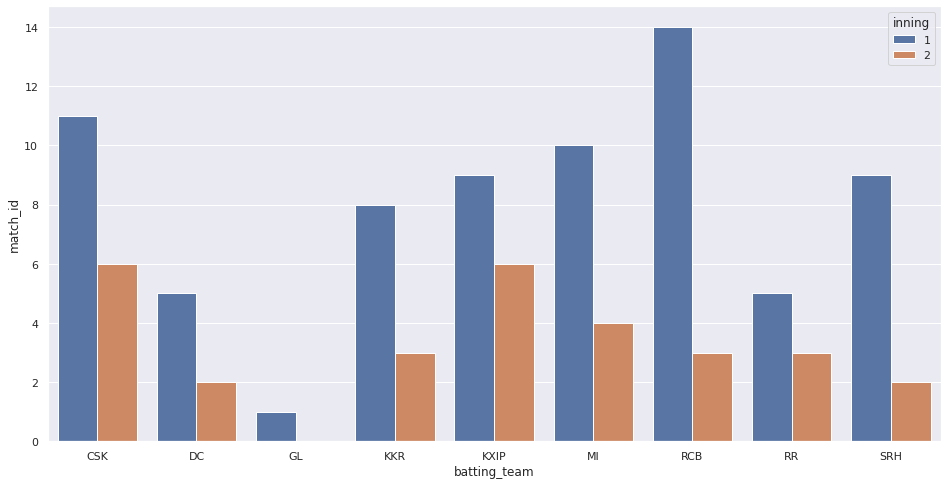

In [28]:
plt.figure(figsize=(16,8))
sns.barplot(x='batting_team', y='match_id', data=teams, hue='inning')

#### RCB have the most 200+ scores in their 1st innings, while CSK and KXIP do well during their chase.

## Can you chase a 200+ score?

In [29]:
first['is_chased'] = first.apply(lambda row: is_chased(row['batting_team'], row['winner']), axis=1)
chased_200 = first[first['is_chased'] == 1]
chased_200

<ipython-input-29-6d512bf9257b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first['is_chased'] = first.apply(lambda row: is_chased(row['batting_team'], row['winner']), axis=1)


,match_id,inning,season,batting_team,bowling_team,winner,total_runs,is_chased
78,41,1,2017,GL,DC,DC,208,1
130,68,1,2008,SRH,RR,RR,214,1
344,181,1,2010,KXIP,RCB,RCB,203,1
396,208,1,2010,KKR,KXIP,KXIP,200,1
612,320,1,2012,RCB,CSK,CSK,205,1
888,460,1,2014,CSK,KXIP,KXIP,205,1
956,496,1,2014,SRH,KXIP,KXIP,205,1
1228,7898,1,2018,KKR,CSK,CSK,207,1
1234,7902,1,2018,MI,DC,DC,204,1
1262,7917,1,2018,RCB,CSK,CSK,213,1


#### There are 13 instances of a 200+ target being successfully being chased

## Overwise Runs Scored

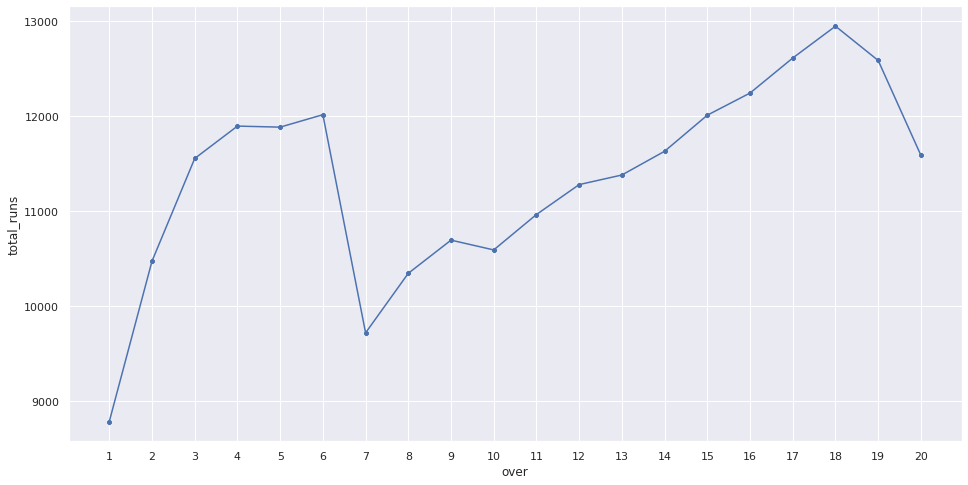

In [30]:
ov_grp = deliv.groupby(['over'])
runs = ov_grp['total_runs'].sum().reset_index()
plt.figure(figsize=(16,8))
sns.lineplot(x='over', y='total_runs', data=runs)
plt.xticks(np.arange(1,21))
sns.scatterplot(x='over', y='total_runs', data=runs)

#### See that sharp decline at the 7th over? It's the end of the powerplay which forced fielding restrictions.
#### Also, the falling of graph at the death indicates two things :
- More wickets falling at the death as batsmen try to hit everything into the outer space.
- Most 2nd innings do not get to the 19th or 20th over, the match finishes way before that.

### Runs per Over for different teams

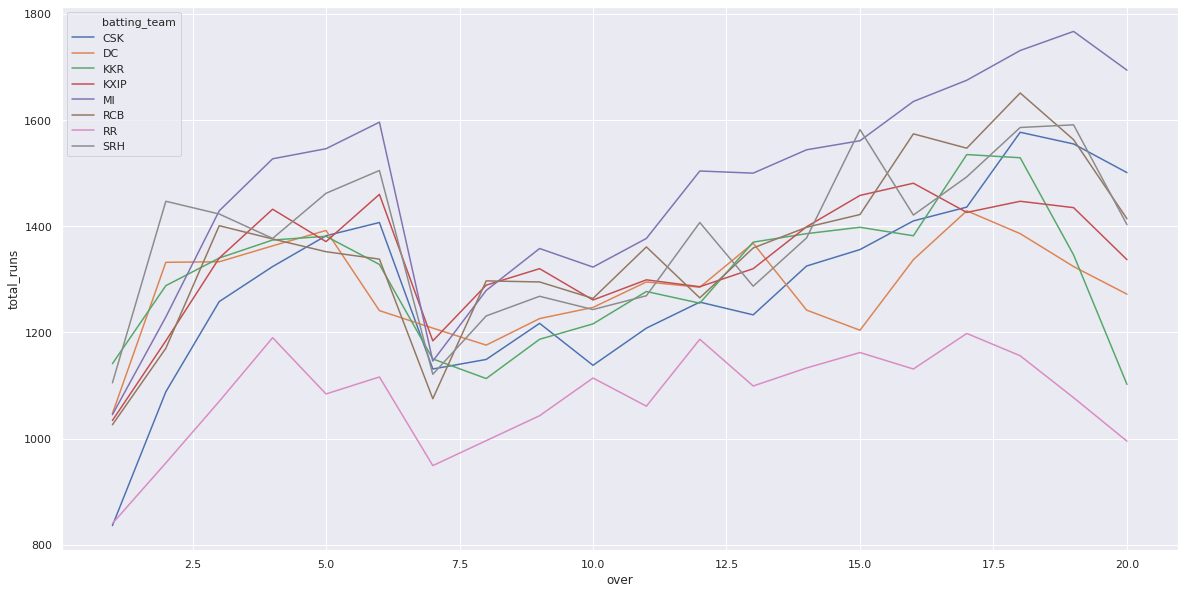

In [31]:
team_rpo = deliv.groupby(['over','batting_team'])['total_runs'].sum().reset_index()
exc_teams = ['RPS','GL','KTK','PW']
team_rpo = team_rpo[~team_rpo['batting_team'].isin(exc_teams)]
plt.figure(figsize=(20,10))
sns.lineplot(x='over', y='total_runs', data=team_rpo, hue='batting_team')

- Mumbai Indians seem to be good at the death (maybe due to players like Pollard and Pandya)
- Rajasthan Royals are the worst throughout the 20 overs.